In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from scipy.io import loadmat

import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import scipy.stats
import math
import pandas as pd
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install -q scikit-plot
!pip install spectral
from spectral import *

     |████████████████████████████████| 212 kB 26.6 MB/s 


Reading Image and Ground Truth


In [ ]:
def read_HSI():
  x=loadmat('PaviaU.mat')['paviaU']
  y=loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"Dataset_shape:{x.shape}\nGround_truth.shape:{y.shape}")
  return x,y
x,y= read_HSI()

Dataset_shape:(610, 340, 103)
Ground_truth.shape:(610, 340)


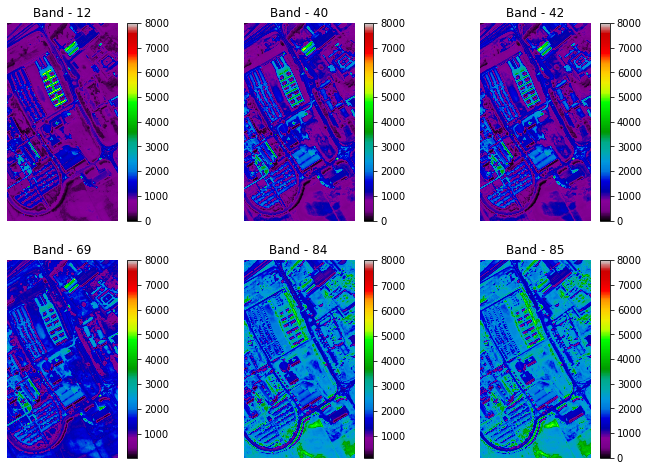

In [ ]:
fig = plt.figure(figsize = (12, 8))
for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(x.shape[2])
    plt.imshow(x[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
    plt.colorbar()

In [ ]:
fig= px.imshow(y, color_continuous_scale='inferno',)
                
fig.update_layout(title = 'Gound Truth', coloraxis_showscale=True)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

Extracting all the Pixel Values

In [ ]:
def extract_pixels(x,y):###extracting all the pixels values
  q=x.reshape(-1,x.shape[2])
  df=pd.DataFrame(q)
  df=pd.concat([df,pd.DataFrame(data=y.ravel())],axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+x.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df 

In [ ]:
df = extract_pixels(x,y)
df

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,574,594,504,411,468,443,378,342,352,434,...,2150,2157,2157,2169,2151,2108,2077,2076,2136,0
207396,485,644,709,582,504,494,434,373,391,421,...,2264,2295,2282,2265,2275,2293,2274,2274,2258,0
207397,593,387,428,461,470,392,331,383,439,355,...,2393,2407,2433,2413,2373,2389,2382,2407,2423,0
207398,593,751,655,458,503,560,482,412,404,454,...,2340,2333,2332,2288,2251,2280,2312,2308,2289,0


In [ ]:
df.shape

(207400, 104)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [ ]:
df.iloc[:,:-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,...,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,...,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,145.000000,146.000000,150.000000,140.000000,0.000000,134.000000,0.000000
25%,649.000000,555.000000,483.000000,473.000000,480.000000,474.000000,461.000000,444.000000,433.000000,430.000000,...,1696.000000,1699.000000,1693.000000,1690.000000,1696.000000,1692.000000,1685.000000,1675.000000,1682.000000,1692.000000
50%,857.000000,762.000000,694.000000,690.000000,693.000000,681.000000,671.000000,661.000000,657.000000,658.000000,...,2246.000000,2252.000000,2244.000000,2236.000000,2238.000000,2235.000000,2231.000000,2226.000000,2244.000000,2261.000000
75%,1111.000000,1046.000000,1015.000000,1036.000000,1058.000000,1066.000000,1068.000000,1064.000000,1066.000000,1080.000000,...,2724.000000,2730.000000,2721.000000,2711.000000,2701.000000,2688.000000,2683.000000,2677.000000,2692.000000,2715.000000
max,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000


In [ ]:
def plot_signature(df):###plotting any random pixel value to identify the class present in it
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 104), df.iloc[pixel_no, :-1].values.tolist(),'b--',label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

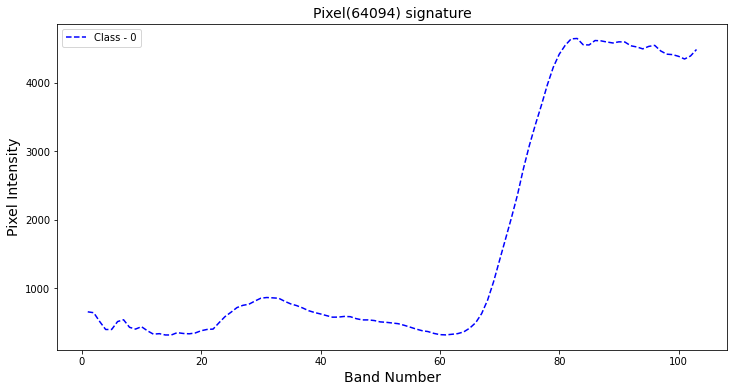

In [ ]:
plot_signature(df)

In [ ]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [0 1 4 2 8 5 9 6 3 7]


In [ ]:
df.loc[:, 'class'].value_counts()

0    164624
2     18649
1      6631
6      5029
8      3682
4      3064
3      2099
5      1345
7      1330
9       947
Name: class, dtype: int64

In [ ]:
class_labels = {'1': 'Asphalt'	,
'2'	:'Meadows'	,
'3'	:'Gravel'	,
'4'	:'Trees'	,
'5'	:'Painted metal sheet'	,
'6'	: 'Bare soil'	,
'7'	:'Bitumen'	,
'8'	:'Self-blocking bricks'	,
'9'	:'Shadows'}

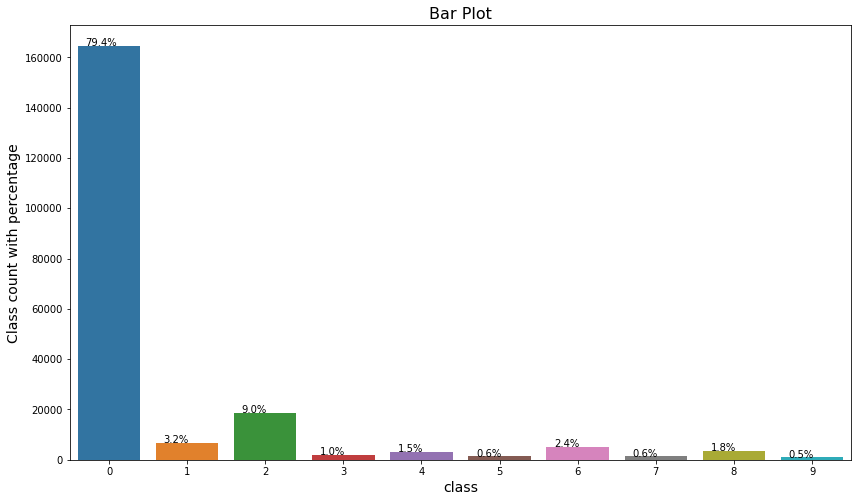

In [ ]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Class count with percentage', fontsize=14)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

In [ ]:
X = df.iloc[:, :-1].values

Y = df.iloc[:, -1].values

In [ ]:
X.shape, Y.shape

((207400, 103), (207400,))

Applying PCA for Feature Extraction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,1+x.shape[2])]+['class']

In [ ]:
q

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-95,PC-96,PC-97,PC-98,PC-99,PC-100,PC-101,PC-102,PC-103,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,-832.898970,293.239776,278.385213,-285.609914,251.208844,...,0.296288,1.181724,3.725747,-6.941622,-0.214874,-0.785944,-1.757598,0.613904,0.711679,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,-496.202149,362.925839,187.355434,-287.796733,180.614526,...,-3.325899,-0.992556,-0.003069,-2.702325,-4.231897,-0.346036,1.212476,0.809433,-0.569451,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,-560.804196,-140.004203,8.847608,-211.057195,14.139042,...,2.043676,3.846506,0.507142,2.387454,0.739171,1.016206,-2.899193,-3.736167,1.226546,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,-409.493899,218.391586,-2.957277,-223.380076,188.819722,...,1.477577,4.373741,1.270309,1.414024,-2.149462,-0.387003,2.065415,0.401348,-0.816765,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,-189.044607,-71.142484,-97.987804,-126.456170,215.182030,...,-2.129175,2.603266,2.357680,0.802600,-1.401948,-1.405575,1.145374,1.579826,0.974568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,-4315.315283,208.879103,-37.600057,-15.785801,116.620060,94.731463,-24.377063,-56.796093,-24.726144,-120.221992,...,5.075800,0.234385,-0.361232,0.393320,-1.260012,-1.137407,-2.776108,-0.119963,-0.067501,0
207396,-4012.494488,685.248307,199.328731,55.691615,137.768056,98.122063,-20.840423,-305.353258,-69.463159,-224.923459,...,-1.441541,1.119331,2.718144,-2.443381,0.588651,0.991763,1.046025,-2.447197,1.519302,0
207397,-3975.035084,1643.062559,253.132178,-287.686124,114.539234,212.257349,-7.753115,-106.171030,80.450729,-58.222229,...,2.608519,0.875388,2.903725,1.286999,1.104778,2.598547,1.201545,-2.168666,-0.009533,0
207398,-4042.639452,1231.520377,499.960314,-126.281001,-153.053615,288.243257,-33.275723,-206.172221,22.918281,-174.921876,...,2.669784,-6.362875,0.621153,0.121552,1.960362,-1.863298,3.185042,-0.344850,0.660605,0


In [ ]:
pca = PCA(n_components=5, whiten=True)### applying PCA for dimensionality reduction
principalComponents = pca.fit_transform(X)

principalComponents.shape

(207400, 5)

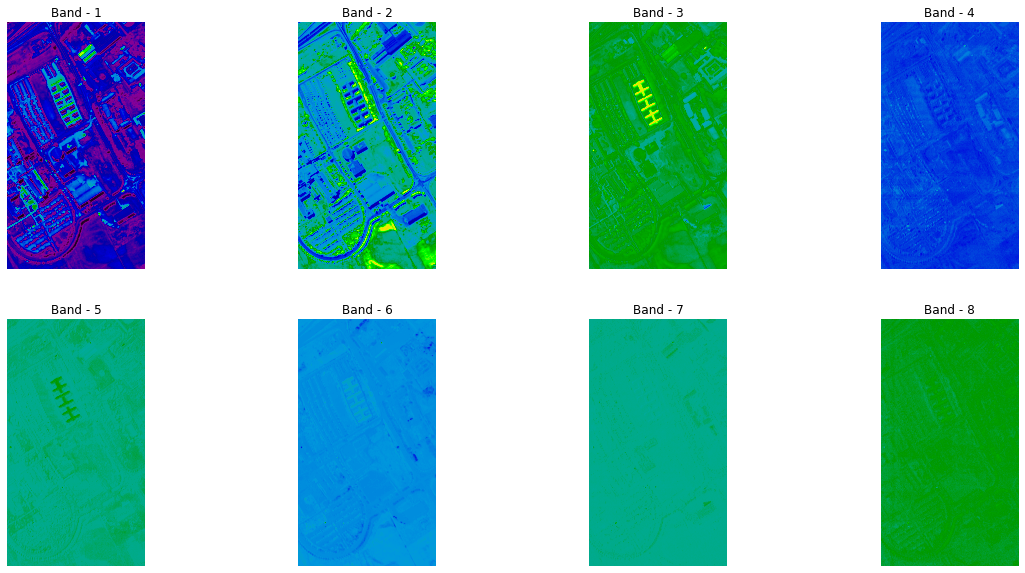

In [ ]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(610,340), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

In [ ]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df.iloc[:, :-1].values)
new = pd.concat([pd.DataFrame(data = principalComponents), pd.DataFrame(data = y.ravel())], axis = 1)
new.columns = [f'PC-{i}' for i in range(1,6)]+['class']
new

,PC-1,PC-2,PC-3,PC-4,PC-5,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,0
...,...,...,...,...,...,...
207395,-4315.315283,208.879103,-37.600057,-15.785801,116.620060,0
207396,-4012.494488,685.248307,199.328731,55.691615,137.768056,0
207397,-3975.035084,1643.062559,253.132178,-287.686124,114.539234,0
207398,-4042.639452,1231.520377,499.960314,-126.281001,-153.053615,0


In [ ]:
ev=pca.explained_variance_ratio_
ev

array([0.58318064, 0.36100695, 0.04437561, 0.00300841, 0.00209792])

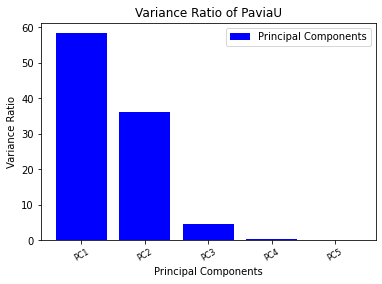

In [ ]:
plt.bar([1,2,3,4,5],list(ev*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
pc=[]
for i in range(15):
    pc.append('PC'+str(i+1))
#plt.xticks([1,2,3,4,5],pc, fontsize=8, rotation=30)
plt.xticks([1,2,3,4,5],pc, fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of PaviaU')
plt.show()

Implementing SVM 

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, Y,  range(X.shape[0]), 
                                                                                  test_size = 0.3, random_state = 11)

In [ ]:
X_train.shape, X_test.shape

((145180, 5), (62220, 5))

In [ ]:
y_train.shape, y_test.shape

((145180,), (62220,))

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC## using SVM algo for classification
classifier= SVC(kernel='rbf',gamma='auto',random_state=0)
classifier.fit(X_train,y_train) 

SVC(gamma='auto', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')### Accuracy score

Accuracy: 79.8826743812279%


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
cm

array([[49265,     0,     3,     0,     0,    98,     0,     0,     0,
            0],
       [ 1954,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [ 5541,     0,    50,     0,     0,     0,     0,     0,     0,
            0],
       [  637,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  921,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   29,     0,     0,     0,     0,   388,     0,     0,     0,
            0],
       [ 1494,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  394,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [ 1163,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  283,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

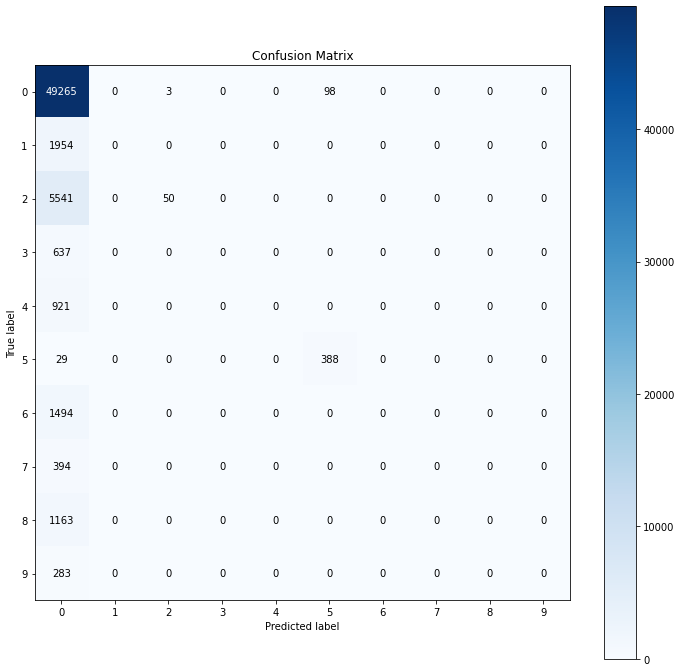

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))## plotting confusion matrix

In [ ]:
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     49366
           1       0.00      0.00      0.00      1954
           2       0.94      0.01      0.02      5591
           3       0.00      0.00      0.00       637
           4       0.00      0.00      0.00       921
           5       0.80      0.93      0.86       417
           6       0.00      0.00      0.00      1494
           7       0.00      0.00      0.00       394
           8       0.00      0.00      0.00      1163
           9       0.00      0.00      0.00       283

    accuracy                           0.80     62220
   macro avg       0.25      0.19      0.18     62220
weighted avg       0.72      0.80      0.71     62220



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.svm import SVC## using SVM algo for classification
classifier= SVC(kernel='linear',gamma='auto',random_state=0)
classifier.fit(X_train,y_train) 

SVC(gamma='auto', kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')### Accuracy score

Accuracy: 79.71391835422693%


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
cm

array([[49265,     0,     0,     0,     0,   101,     0,     0,     0,
            0],
       [ 1954,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [ 5591,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  637,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  921,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   84,     0,     0,     0,     0,   333,     0,     0,     0,
            0],
       [ 1494,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  394,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [ 1163,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  283,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

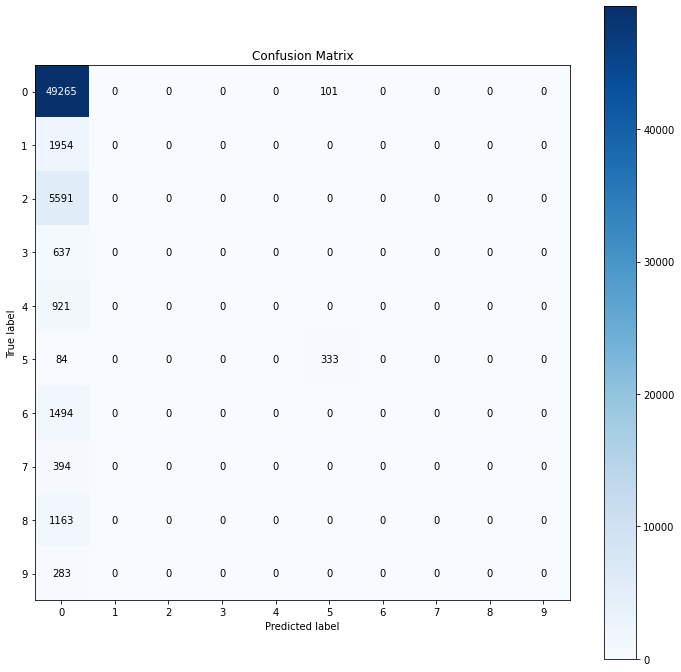

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))## plotting confusion matrix

In [ ]:
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     49366
           1       0.00      0.00      0.00      1954
           2       0.00      0.00      0.00      5591
           3       0.00      0.00      0.00       637
           4       0.00      0.00      0.00       921
           5       0.77      0.80      0.78       417
           6       0.00      0.00      0.00      1494
           7       0.00      0.00      0.00       394
           8       0.00      0.00      0.00      1163
           9       0.00      0.00      0.00       283

    accuracy                           0.80     62220
   macro avg       0.16      0.18      0.17     62220
weighted avg       0.64      0.80      0.71     62220



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.svm import SVC## using SVM algo for classification
classifier= SVC(kernel='poly',gamma='auto',random_state=0)
classifier.fit(X_train,y_train) 

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')### Accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
cm

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))## plotting confusion matrix

In [ ]:
print('Classification report:\n',classification_report(y_test,y_pred))

Implementing  Multiclass SVM


In [ ]:
def projection_simplex(v, z=1):

    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w


class MulticlassSVM(BaseEstimator, ClassifierMixin):

    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose

    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g

    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue

            smallest = min(smallest, g[k])

        return g.max() - smallest

    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]

        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)

        return Ci - self.dual_coef_[:, i] - beta / norms[i]

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)

        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))

        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))

        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)

        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0

            for ii in range(n_samples):
                i = ind[ii]

                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue

                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v

                if v < 1e-12:
                    continue

                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)

                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta

            if it == 0:
                violation_init = violation_sum

            vratio = violation_sum / violation_init

            if self.verbose >= 1:
                print("iter", it + 1, "violation", vratio)

            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break

        return self

    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)

In [ ]:
clf = MulticlassSVM(C=0.1, tol=0.01, max_iter=100, random_state=0, verbose=1)
clf.fit(X_train, y_train)

iter 1 violation 1.0
iter 2 violation 0.16933247985339364
iter 3 violation 0.07842698178771475
iter 4 violation 0.050819057913712835
iter 5 violation 0.03770514895617791
iter 6 violation 0.03014677879352659
iter 7 violation 0.024460590493740206
iter 8 violation 0.020478226962947536
iter 9 violation 0.017555314560026774
iter 10 violation 0.015533067092742311
iter 11 violation 0.013633033122617435
iter 12 violation 0.012275326551154774
iter 13 violation 0.010839844730992535
iter 14 violation 0.00919007070715016
Converged


MulticlassSVM(C=0.1, max_iter=100, random_state=0, tol=(0.01,), verbose=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test,y_pred)*100}%')

Accuracy: 49.38604950176792%


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
cm

array([[29744,     0,  4438,    85,     2,    30,  9092,  2245,  3730,
            0],
       [  732,     0,   480,     2,     2,     0,   280,    10,   448,
            0],
       [ 4023,     0,   448,    19,     0,    25,   778,   184,   114,
            0],
       [  214,     0,     5,     0,     0,     0,   415,     2,     1,
            0],
       [  834,     0,     1,     0,     0,     0,    14,    62,    10,
            0],
       [    0,     0,    11,     0,     0,     0,     0,     1,   405,
            0],
       [  802,     0,   121,     0,     0,     0,   531,    18,    22,
            0],
       [   17,     0,   299,     0,     0,     0,    41,     1,    36,
            0],
       [   88,     0,    25,     0,     0,     0,  1046,     0,     4,
            0],
       [  281,     0,     0,     0,     0,     0,     0,     0,     2,
            0]])

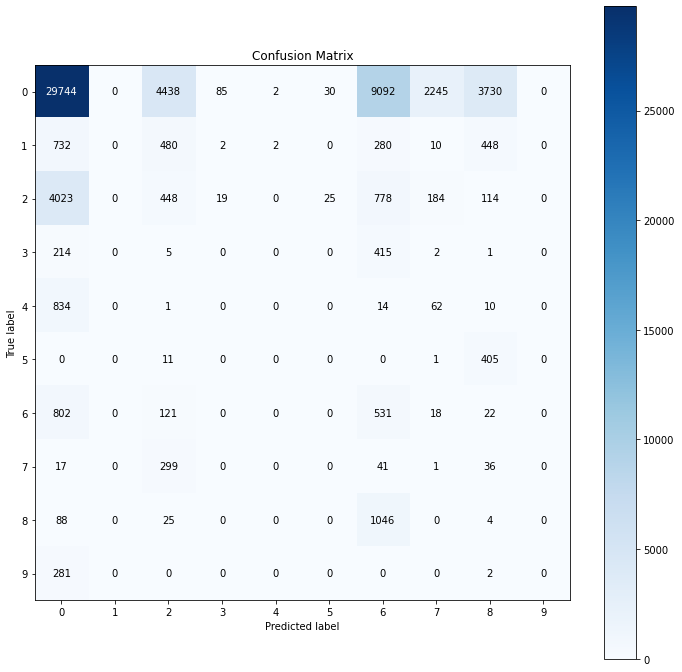

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))## plotting confusion matrix

In [ ]:
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.60      0.69     49366
           1       0.00      0.00      0.00      1954
           2       0.08      0.08      0.08      5591
           3       0.00      0.00      0.00       637
           4       0.00      0.00      0.00       921
           5       0.00      0.00      0.00       417
           6       0.04      0.36      0.08      1494
           7       0.00      0.00      0.00       394
           8       0.00      0.00      0.00      1163
           9       0.00      0.00      0.00       283

    accuracy                           0.49     62220
   macro avg       0.09      0.10      0.08     62220
weighted avg       0.65      0.49      0.56     62220



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



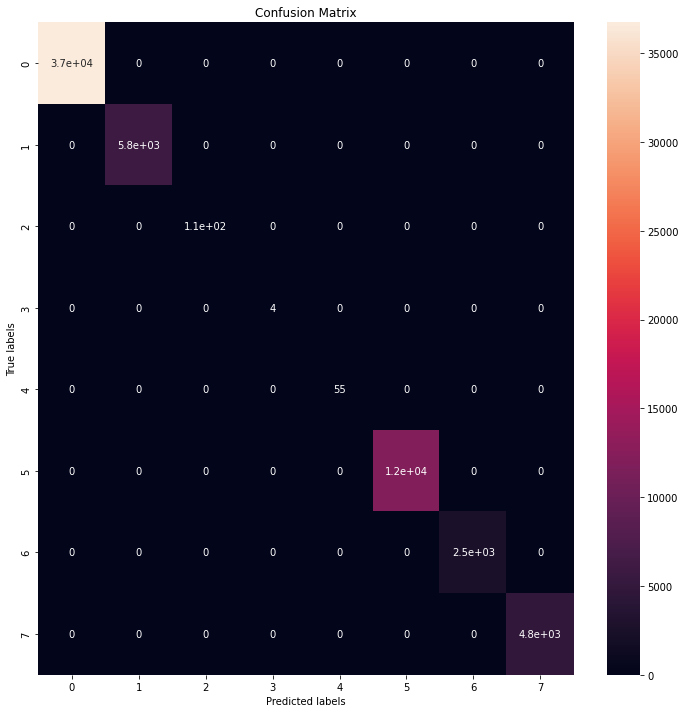

In [ ]:
from sklearn.metrics import confusion_matrix

f = plt.figure(figsize=(12,12))
ax= f.add_subplot()

predict_results = clf.predict(X_test)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);